World Happiness Report

In [1]:
!pip install plotly

In [2]:
!pip install feature_engine

In [3]:
!pip install wikipedia

In [5]:
!pip install chart_studio

In [6]:
#Importing the necessary libraries
#linear algebra
import numpy as np
#importing data frame libraries
import pandas as pd
#importing visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#importing warning libraries
import warnings
warnings.filterwarnings("ignore")

In [7]:
#loading dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [8]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
#checking dataset shape
df.shape

(158, 12)

Observation:their are 158 rows and 12 columns

In [10]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

observation:
1] the country and region is a categorical data,happiness rank is int64,happiness score,standard error,Economy, Family,Health,Freedom,Trust,Generosity,Dystopia Residual.In this data set the target variable is happiness score.

In [11]:
#checking null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

observation:
1]Their is no null values in the data set.All the columns are null.

<AxesSubplot:>

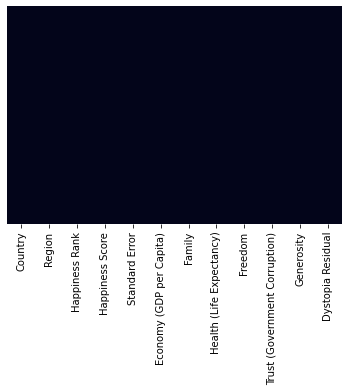

In [12]:
#checking null values via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Exploring categorical data

In [13]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+ ' '+str(df[column].unique()))
        print(df[column].value_counts())
        print('*****************************************************************************************')
        print('\n')

Country ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'


EDA

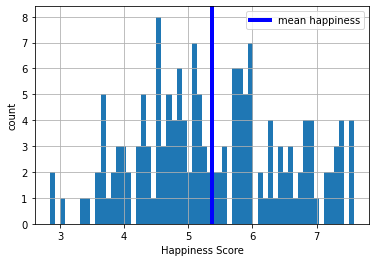

In [14]:
Happiness_score=df['Happiness Score'].hist(bins=60)
mean_val=np.mean(df['Happiness Score'])
plt.axvline(mean_val,linewidth=4,color="blue",label='mean happiness')
plt.xlabel('Happiness Score')
plt.ylabel('count')
plt.legend()
plt.show()

observation:
1]The above graph shows that happiness score lies between 5-6 in happiness report data set.

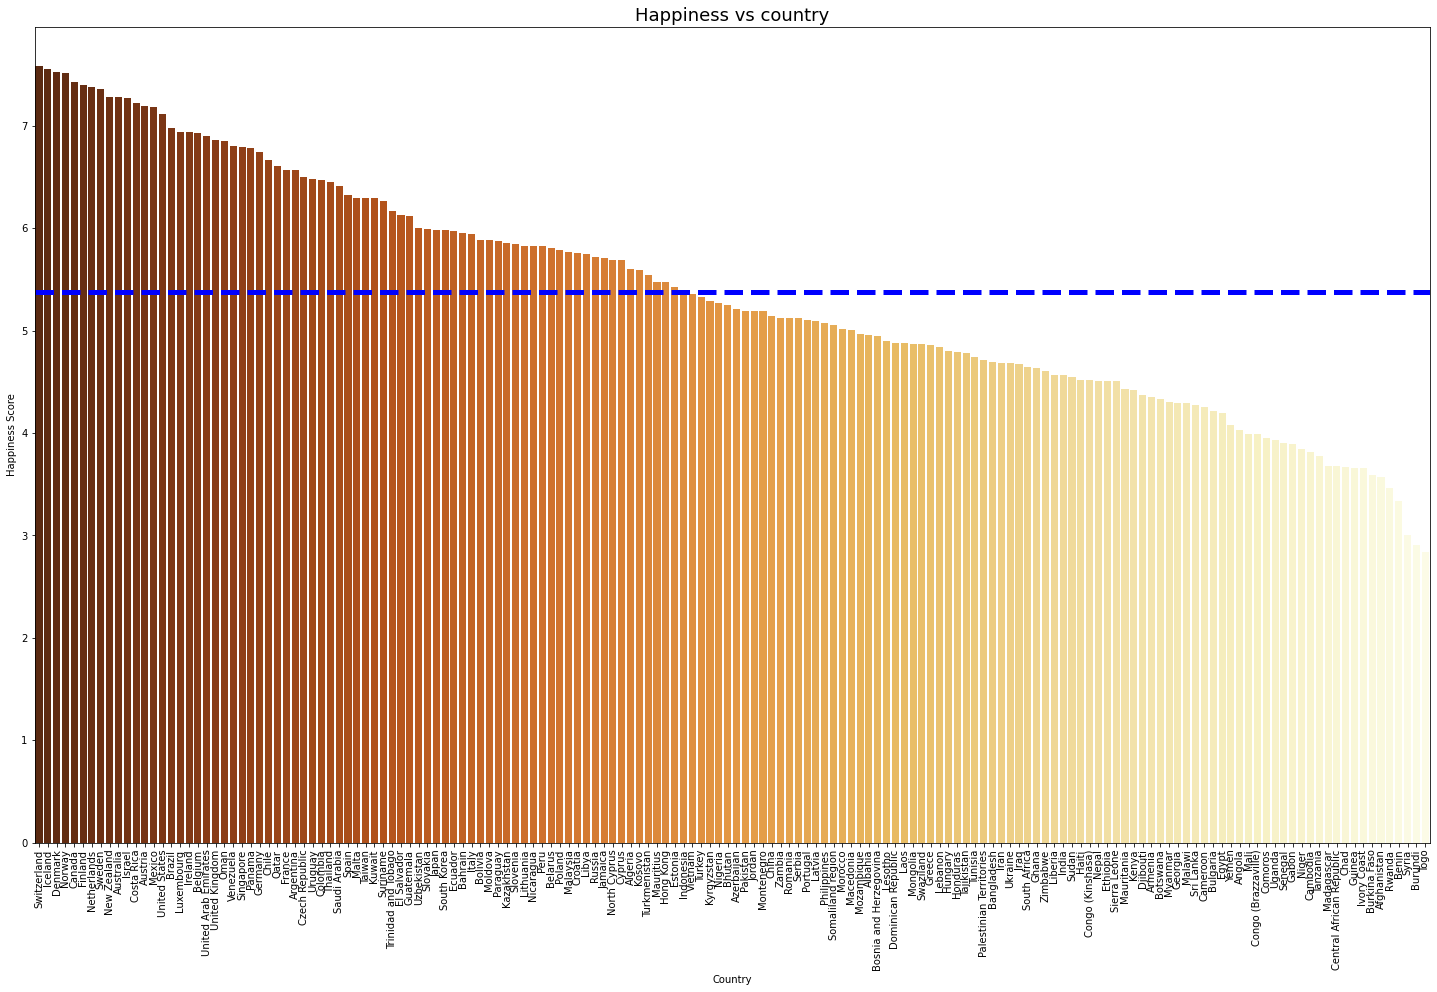

5.192    2
5.548    1
4.867    1
4.800    1
3.896    1
        ..
5.759    1
4.677    1
6.901    1
6.003    1
6.611    1
Name: Happiness Score, Length: 157, dtype: int64


In [15]:
plt.figure(figsize=(25,15))
mean_happiness=np.mean(df['Happiness Score'])
sns.barplot(x='Country',y='Happiness Score',data=df,palette="YlOrBr_r")
plt.axhline(mean_happiness,color="b",linestyle="dashed",linewidth=5)
plt.title("Happiness vs country",fontsize=18)
plt.xticks(rotation="vertical")
plt.show()
print(df["Happiness Score"].value_counts())

observation:
1]The above visualization shows that Switzerland is the happiest country.
2]Iceland is the second happiest country.
3]Benin,Syria,Brundy,Togo are tghe saddest country.

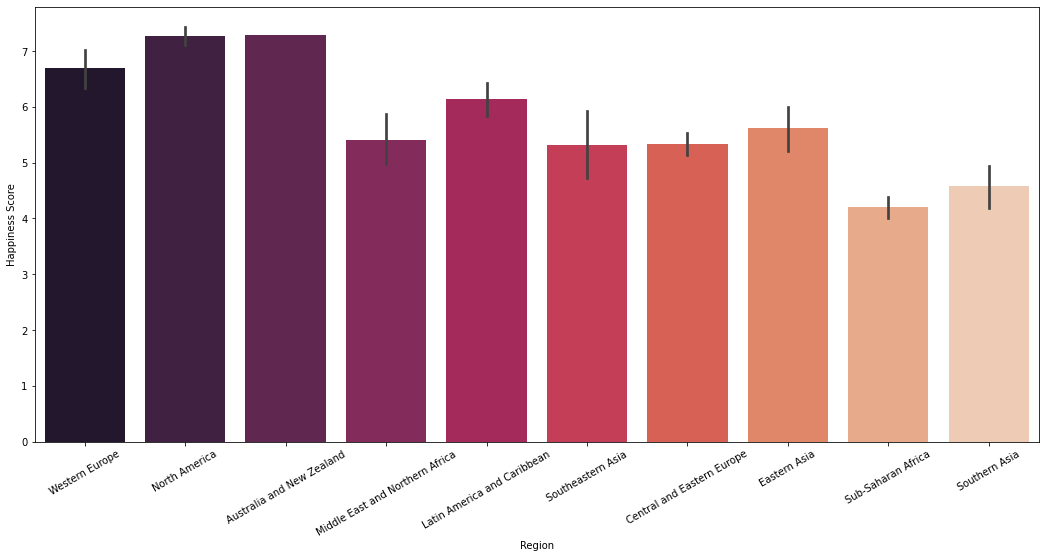

In [16]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region",y="Happiness Score",data=df,palette='rocket')
plt.xticks(rotation=30)
plt.show()

Observation:North America,Australia and Newzeland are the most happiest reguion in the happiness report,western europe is also in good shape in happiness .latinamerica and carebian ,middle east and northern africa are also in good bond with happiness.Sotheasternasia,central and eastern europe,eastern asia are improving region of happiness score.Sub-Saharan africa and southern asia have badly affected with happiness score.

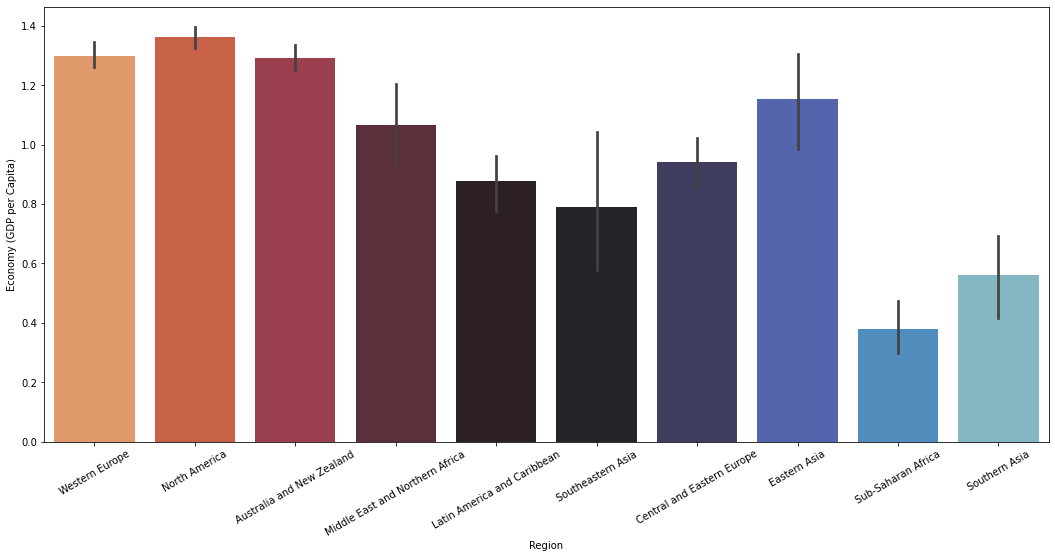

In [17]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region",y="Economy (GDP per Capita)",data=df,palette="icefire_r")
plt.xticks(rotation=30)
plt.show()

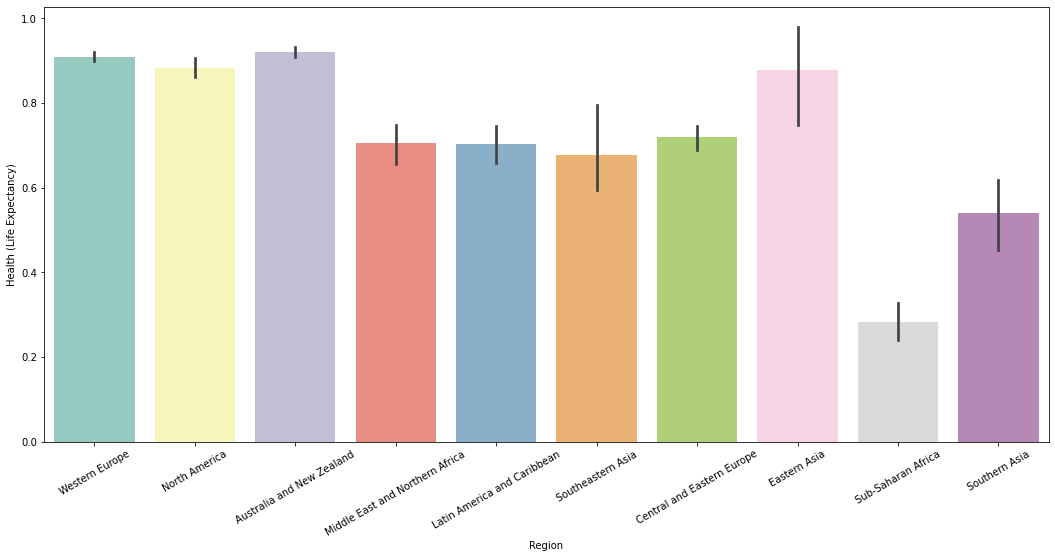

In [18]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region",y="Health (Life Expectancy)",data=df,palette="Set3")
plt.xticks(rotation=30)
plt.show()

Observation:we can see that in this visualization,australia and newzealand has highest life expectancy.western europe and north america also have good life expectency in this region.It comes down,when it comes to middle east and northern africa,latin america and caribbean,southeasten asia and central and eastern europe with the health (life expantancy).Eastern asia is improving thei life expantancy.southern asia and sub-saharan africa has very low rate of heath (life expantancy).

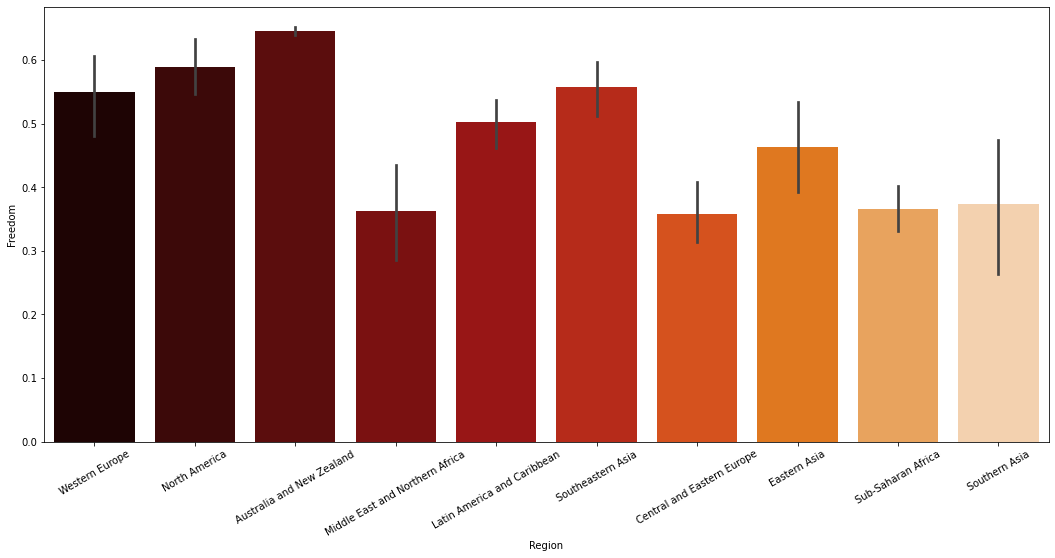

In [19]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region",y="Freedom",data=df,palette="gist_heat")
plt.xticks(rotation=30)
plt.show()

Observation:In this senario it has different story in middle east,northern africa,central and eastern europe,sub-saharan africa and southern asia their is no such great freedom as they are suffering from happiness.This region's people are not at all happy with such type of restrictions.So i can see that australia and newzealand has better rate of freedom and they are the most happiest region in the world.western europe and northern africa also have better freedom in this reagion.

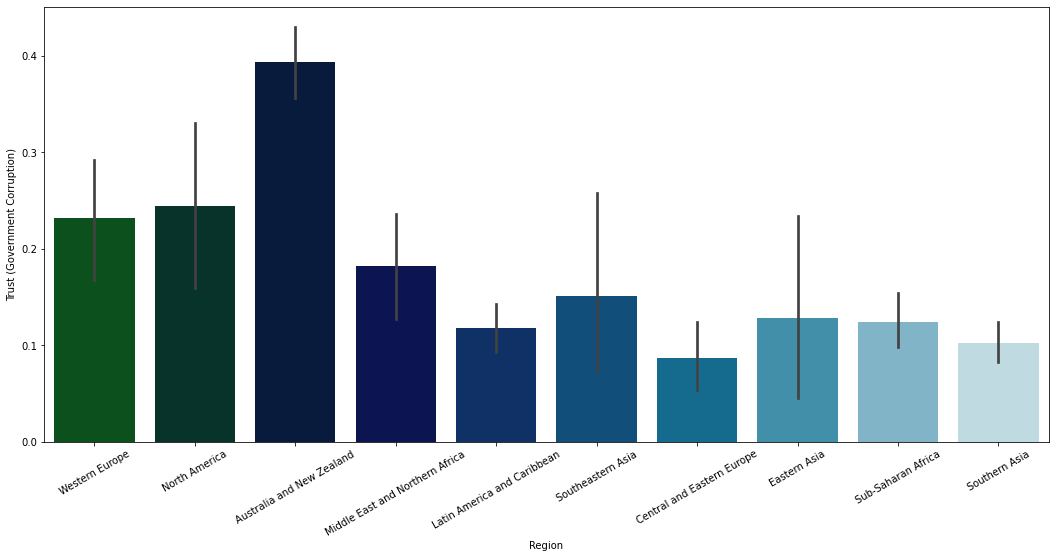

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region",y="Trust (Government Corruption)",data=df,palette="ocean")
plt.xticks(rotation=30)
plt.show()

Observation:in this visualizastioin i can see that their are highest corruption is going but in that process they are not affecting their happiness.while coming to western europe and north america the trust (government corruption) rate is coming down.while middle east and northern africa,south eastern asia has low rate of corruption.latin america and caribbean, central and eastern europe,easten asia,sub-saharan africa and southern asia have very low rate of corruption but people of this region are not happy.

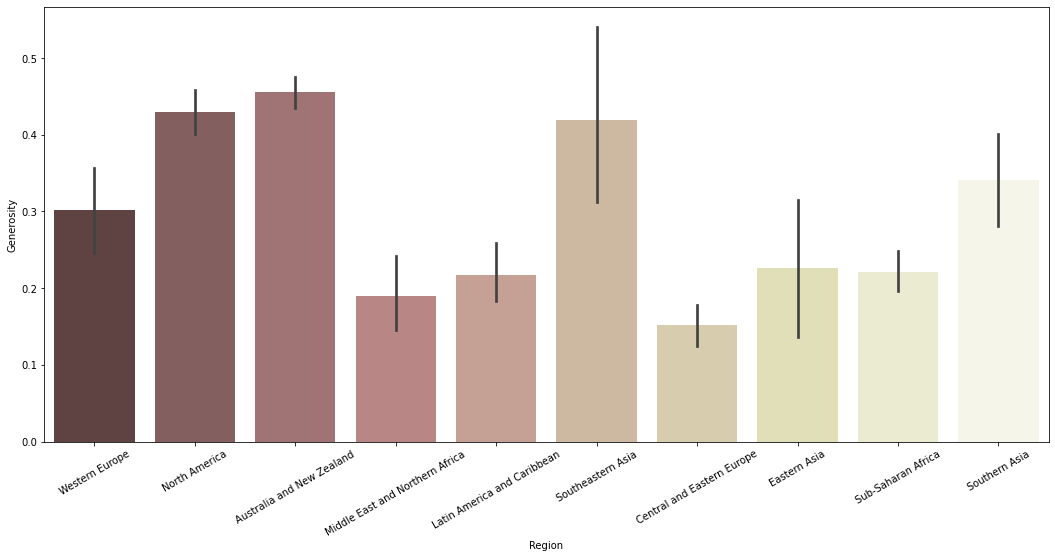

In [21]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region",y="Generosity",data=df,palette="pink")
plt.xticks(rotation=30)
plt.show()

Observation:in the barplot visualization australia and newzealand,north america has good rate of generosity.it is good to see that southeastern asia,southern asia and western europe people also have good generosity.middle east and northern africa,latin america and cribbean,central asia and sub-saharan africa have very bad generosity,they must improve.

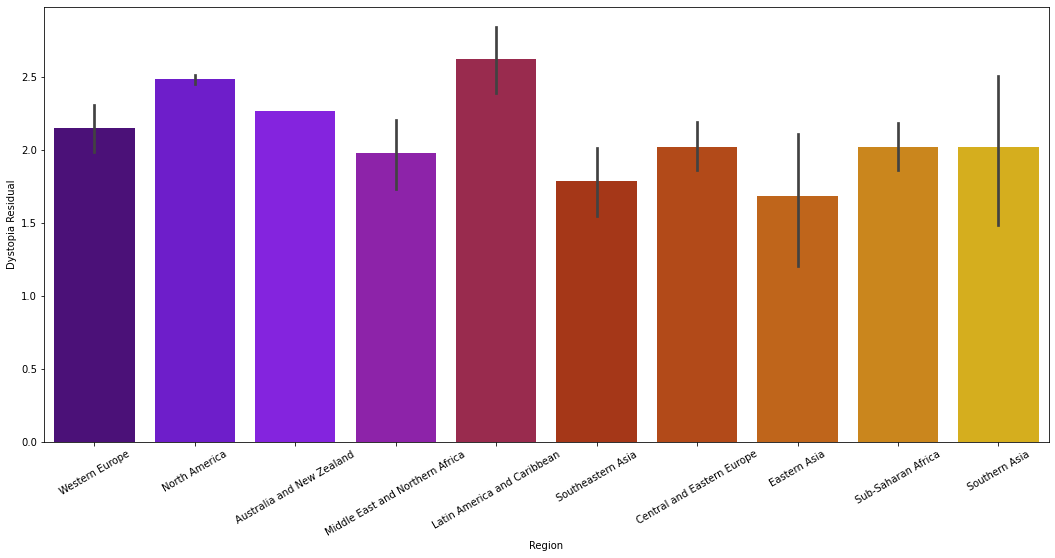

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region",y="Dystopia Residual",data=df,palette="gnuplot")
plt.xticks(rotation=30)
plt.show()

Observation:In the above chart dystopia is an imaginary country which shows that latin america and caribbean are affected by less freedom and more corruption and no support.

Handeling categorical data.

I will convert country and region into numeric form as our model does not read categorical data.

In [23]:
Country=df["Country"]
Country=pd.get_dummies(Country,drop_first=True)

In [24]:
Region=df["Region"]
Region=pd.get_dummies(Region,drop_first=True)

In [25]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
#concetting the region and country
world=pd.concat([df,Region,Country],axis=1)

In [27]:
world.drop(["Region","Country"],axis=1,inplace=True)

In [28]:
world.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0,0,0,0,0,0,0,0,0,0
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0,0,0,0,0,0,0,0,0,0
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0,0,0,0,0,0,0,0,0,0
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0,0,0,0,0,0,0,0,0,0
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0,0,0,0,0,0,0,0,0,0


Summary Statistics

In [29]:
world.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,...,0.006329,0.006329,0.006329,0.006329,0.006329,0.006329,0.006329,0.006329,0.006329,0.006329
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,...,0.079556,0.079556,0.079556,0.079556,0.079556,0.079556,0.079556,0.079556,0.079556,0.079556
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation:Minimum value of happiness rank is 1 and the maximum value is 158.minimum value of happiness score is 2.839000 and minimum value of the same is 7.587000.the minimum value of Economy (GDP per Capita) is zero and the maximum value of the same is 1.690420.minimum value of Freedom is zero and the maximum is 0.669730.the minimum value of Trust (Government Corruption) iszero and the maximum value of Trust (Government Corruption) is 0.551910.

Correlation:

In [30]:
corr=world.corr()

In [31]:
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,...,-0.104104,-0.102354,-0.112853,-0.083106,-0.062108,-0.098854,-0.007863,0.098877,0.009635,0.062130
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,...,0.106651,0.104274,0.121894,0.077563,0.043860,0.100288,-0.001100,-0.090811,-0.017252,-0.053542
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,...,-0.049471,-0.136462,-0.044335,-0.011649,-0.019961,0.078797,-0.078515,-0.019680,0.102705,-0.023276
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,...,0.115417,0.083461,0.108910,0.042804,-0.042442,0.039345,-0.042497,-0.059512,-0.074628,-0.114226
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,...,0.039596,0.086548,0.075270,0.064038,0.102701,0.077871,-0.023159,-0.091158,-0.022024,0.012262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-0.098854,0.100288,0.078797,0.039345,0.077871,0.029248,0.000247,-0.021832,-0.113052,0.157989,...,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,1.000000,-0.006369,-0.006369,-0.006369,-0.006369
Vietnam,-0.007863,-0.001100,-0.078515,-0.042497,-0.023159,0.037751,0.088102,-0.026021,-0.043414,0.014862,...,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,1.000000,-0.006369,-0.006369,-0.006369
Yemen,0.098877,-0.090811,-0.019680,-0.059512,-0.091158,-0.074405,-0.038734,-0.043276,-0.092260,-0.025434,...,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,1.000000,-0.006369,-0.006369
Zambia,0.009635,-0.017252,0.102705,-0.074628,-0.022024,-0.107263,0.031694,-0.012501,-0.026155,0.077426,...,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,-0.006369,1.000000,-0.006369


<AxesSubplot:>

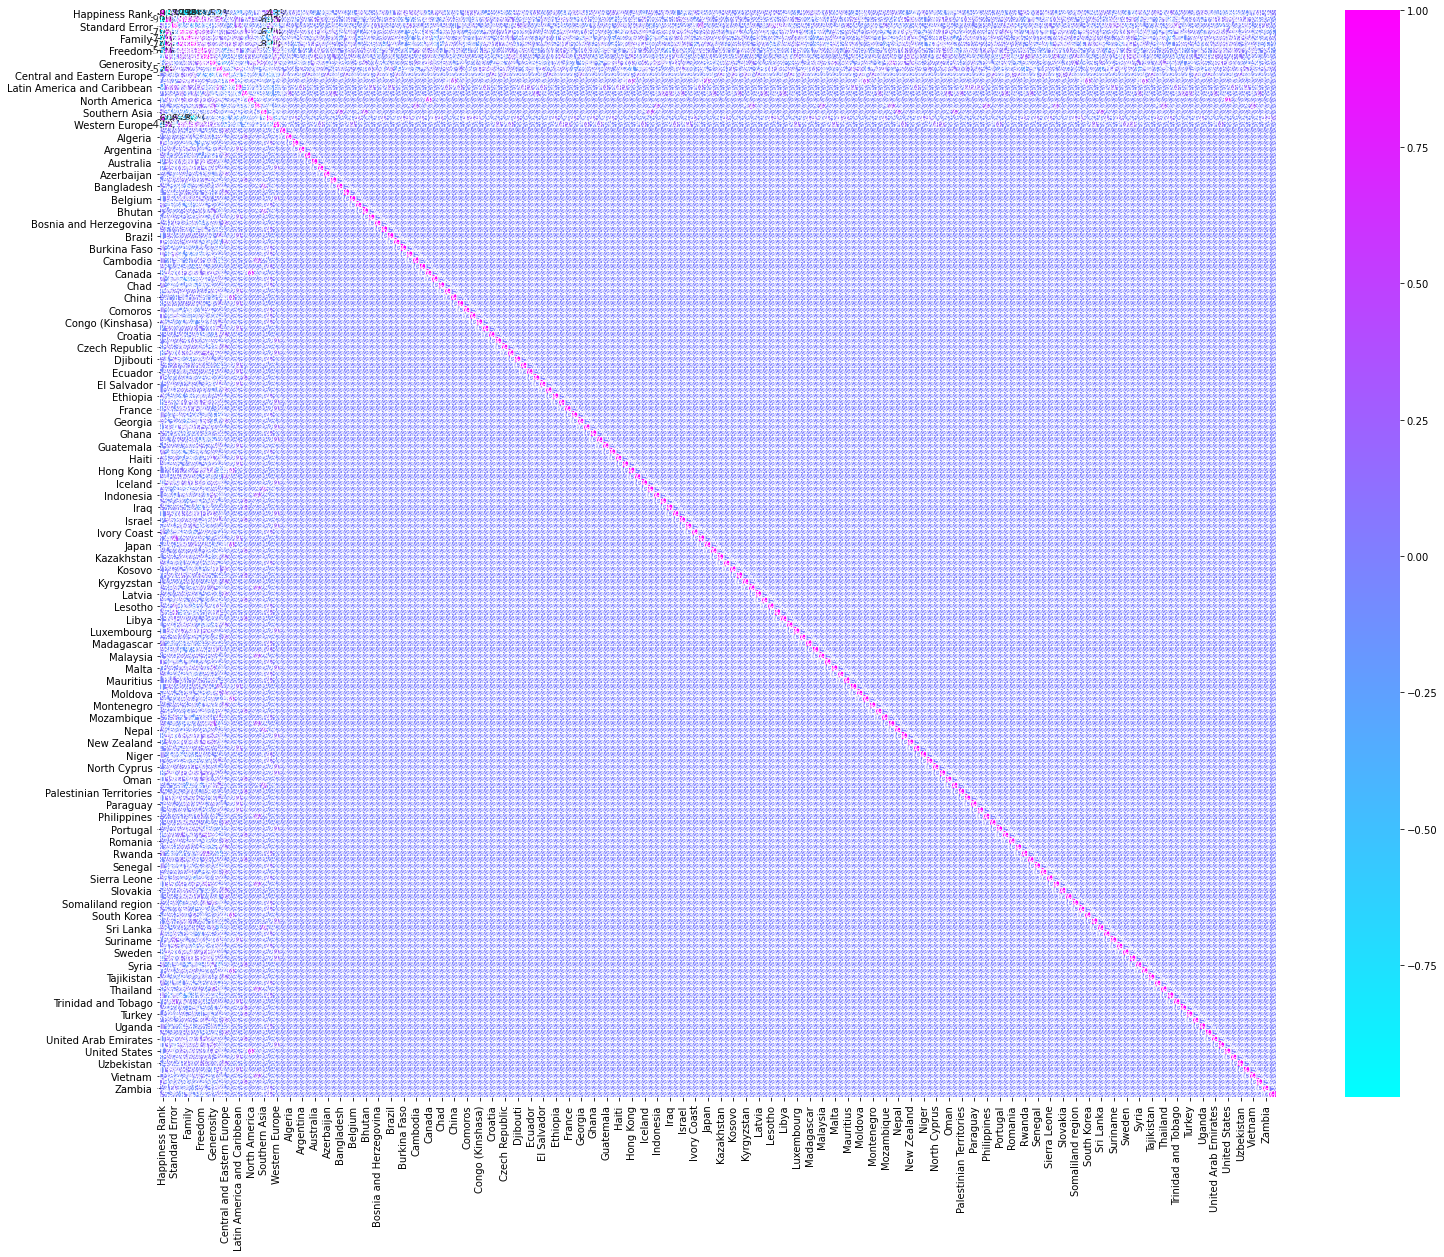

In [32]:
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True,fmt='.0%',cmap='cool')